In [203]:
# Session - 24 20240510
# Minhaz M A
# Virtual Competition 2
# Data - Loan predictions

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [205]:
lptest = pd.read_csv (r"C:\Users\mamin\Downloads\test_lAUu6dG.csv")
lptrain = pd.read_csv (r"C:\Users\mamin\Downloads\train_ctrUa4K.csv")

In [206]:
lptest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [207]:
lptest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [208]:
lptest.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [209]:
lptrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [210]:
lptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [211]:
lptrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [212]:
# Find relationships

<Axes: >

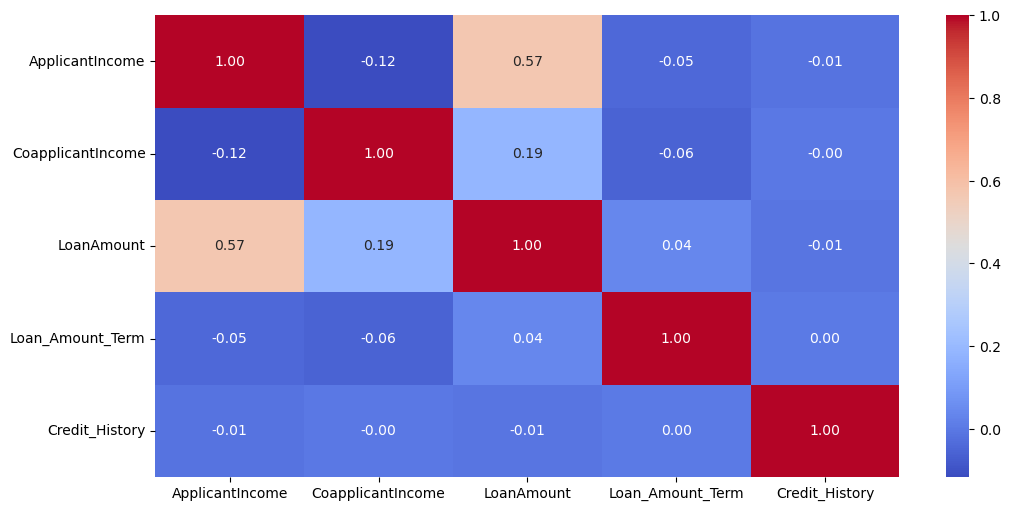

In [213]:
plt.figure(figsize = (12,6))
sns.heatmap(lptrain.corr(), cmap='coolwarm', annot=True, fmt='.2f')

In [214]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
lptrain['Loan_Status'] = lab.fit_transform(lptrain['Loan_Status'])

<Axes: >

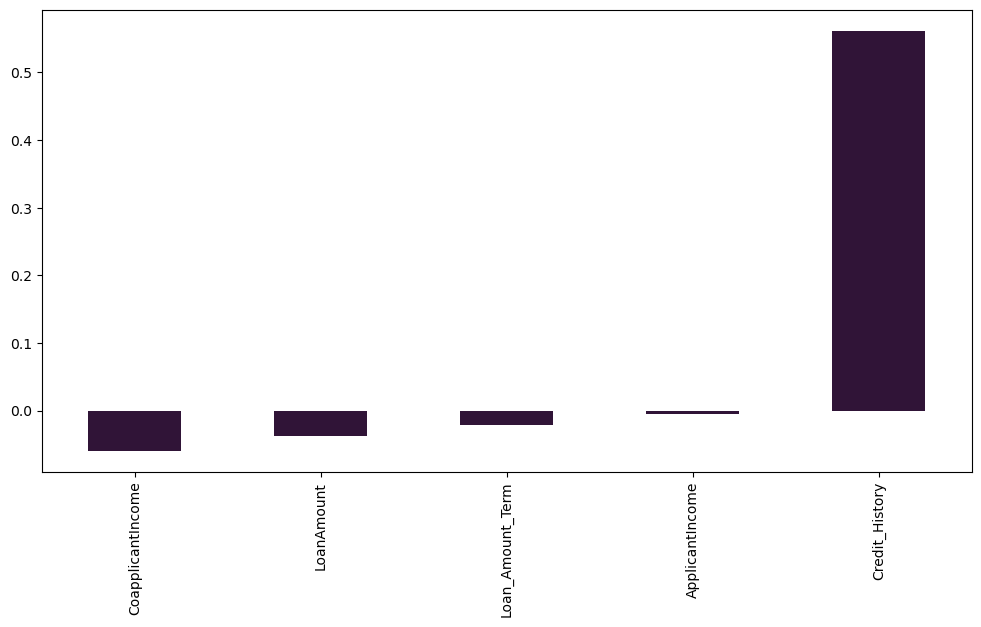

In [215]:
plt.figure(figsize = (12,6))
lptrain.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')

In [216]:
lptrain['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

plt.figure(figsize = (12,6))
lptrain.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'twilight_shifted')
numeric_lptrain = lptrain.select_dtypes(include=['number'])

In [217]:
num_train = lptrain.select_dtypes(include=['number'])

<Axes: >

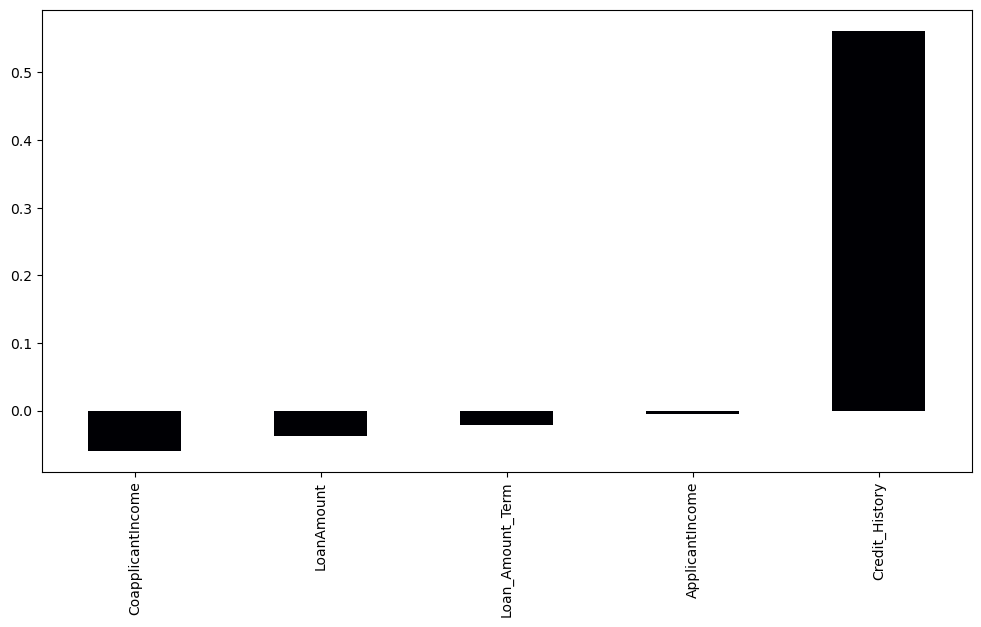

In [218]:
plt.figure(figsize = (12,6))
num_train.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'inferno')

In [219]:
# Exploratory Data Analysis

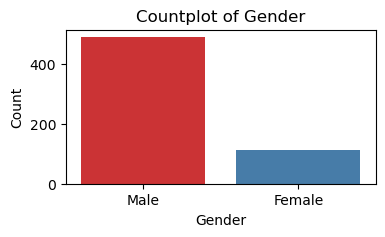

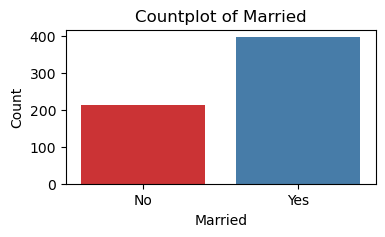

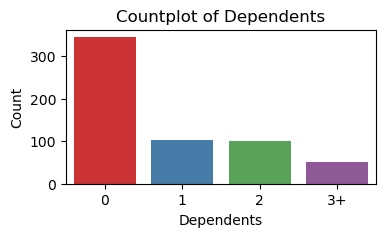

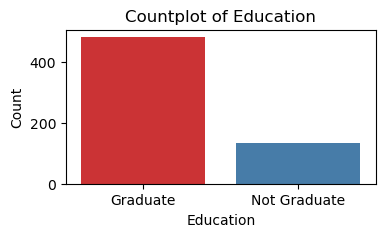

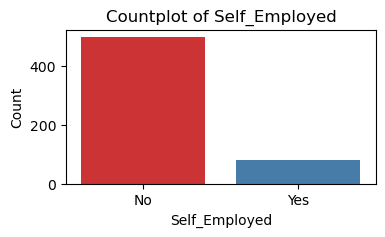

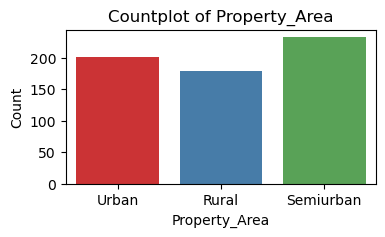

In [220]:
vals = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for val in vals:
  plt.figure(figsize=(4,2))
  sns.countplot(data=lptrain,x=val,palette='Set1')
  plt.title(f'Countplot of {val}')
  plt.ylabel('Count')
  plt.xlabel(val)
  plt.show()

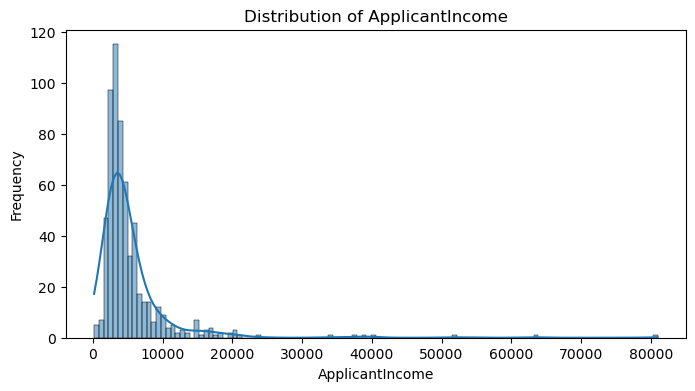

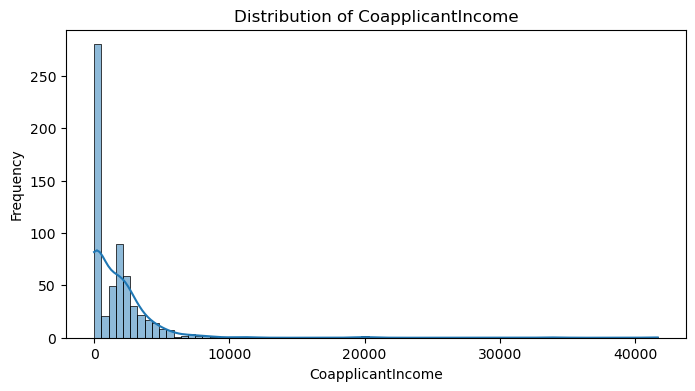

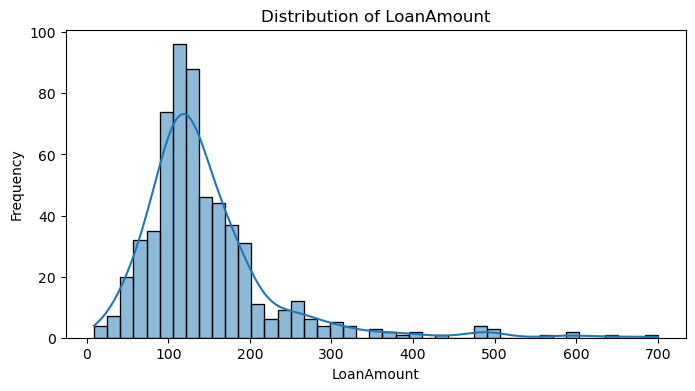

In [221]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(lptrain[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

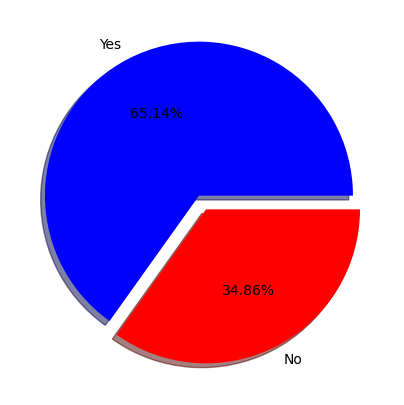

In [222]:
size = lptrain['Married'].value_counts()
labels = ['Yes', 'No']
color = ['blue', 'red']
explode = [0.05, 0.05]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

In [223]:
# Finding Null values and fixing

In [224]:
lptrain.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [225]:
lptest.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [226]:
lptrain['Loan_ID'] = lptrain['Loan_ID'].str.replace('LP00', '')
lptest['Loan_ID'] = lptest['Loan_ID'].str.replace('LP00', '')

In [227]:
# Missing data handling

In [228]:
lptrain['Gender'] = lptrain['Gender'].fillna('Male')
lptrain['Married'] = lptrain['Married'].fillna('Yes')
lptrain['Dependents'] = lptrain['Dependents'].fillna(lptrain['Dependents'].mode()[0])
lptrain['Self_Employed'] = lptrain['Self_Employed'].fillna('No')
lptrain['LoanAmount'] = lptrain['LoanAmount'].fillna(lptrain['LoanAmount'].mean())
lptrain['Loan_Amount_Term'] = lptrain['Loan_Amount_Term'].fillna(lptrain['Loan_Amount_Term'].mode()[0])
lptrain['Credit_History'] = lptrain['Credit_History'].fillna(lptrain['Credit_History'].mode()[0])

In [229]:
lptest['Gender'] = lptest['Gender'].fillna('Male')
lptest['Dependents'] = lptest['Dependents'].fillna(lptest['Dependents'].mode()[0])
lptest['Self_Employed'] = lptest['Self_Employed'].fillna('No')
lptest['LoanAmount'] = lptest['LoanAmount'].fillna(lptest['LoanAmount'].mean())
lptest['Loan_Amount_Term'] = lptest['Loan_Amount_Term'].fillna(lptest['Loan_Amount_Term'].mode()[0])
lptest['Credit_History'] = lptest['Credit_History'].fillna(lptest['Credit_History'].mode()[0])

In [230]:
lptrain.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [231]:
lptest.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [232]:
# Loan_Amount_Term and Dependants needs to be integer type

In [233]:
lptrain['Loan_Amount_Term'] = lptrain['Loan_Amount_Term'].astype('int64')
lptest['Loan_Amount_Term'] = lptest['Loan_Amount_Term'].astype('int64')

In [234]:
# Removing the '+' sign from Dependents column and change to integer type 

In [235]:
lptrain['Dependents'] = lptrain['Dependents'].astype('str')
lptest['Dependents'] = lptest['Dependents'].astype('str')

In [236]:
lptrain['Dependents'] = lptrain['Dependents'].str.rstrip('+')
lptest['Dependents'] = lptest['Dependents'].str.rstrip('+')

In [237]:
lptrain['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [238]:
lptrain['Dependents'] = lptrain['Dependents'].astype('int64')
lptest['Dependents'] = lptest['Dependents'].astype('int64')

In [239]:
lptrain['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [240]:
lptrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 60.1+ KB


In [241]:
lptest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    int64  
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


In [242]:
# Inputing Categorical values - in Test and Train

In [243]:
lptrain['Gender'] = lptrain['Gender'].map({'Male': 1, 'Female': 0})
lptrain['Married'] = lptrain['Married'].map({'No' : 0, 'Yes': 1})
lptrain['Education'] = lptrain['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
lptrain['Self_Employed'] = lptrain['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [244]:
lptest['Gender'] = lptest['Gender'].map({'Male': 1, 'Female': 0})
lptest['Married'] = lptest['Married'].map({'No' : 0, 'Yes': 1})
lptest['Education'] = lptest['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
lptest['Self_Employed'] = lptest['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [245]:
# Creating Dummy variable for Property column

In [246]:
property_area = pd.get_dummies(lptrain['Property_Area'], prefix='Property_Area')
lptrain = pd.concat([lptrain, property_area], axis = 1)
lptrain = lptrain.drop('Property_Area', axis = 1)

In [247]:
property_area = pd.get_dummies(lptest['Property_Area'], prefix='Property_Area')
lptest = pd.concat([lptest, property_area], axis = 1)
lptest = lptest.drop('Property_Area', axis = 1)

In [248]:
# Scaling

In [249]:
from sklearn.preprocessing import StandardScaler
stdscal = StandardScaler()

In [250]:
lptrain['Loan_ID'] = stdscal.fit_transform(lptrain['Loan_ID'].values.reshape(-1, 1))

In [251]:
lptest['Loan_ID'] = stdscal.transform(lptest['Loan_ID'].values.reshape(-1, 1))

In [252]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [253]:
for col in numerical_cols:
    lptrain[col] = stdscal.fit_transform(lptrain[col].values.reshape(-1, 1))
    lptest[col] = stdscal.transform(lptest[col].values.reshape(-1, 1))

In [254]:
# Splitting train data for test

In [255]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
X = lptrain.drop('Loan_Status', axis = 1)
y = lptrain['Loan_Status']
X_test = lptest

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Building Models

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [258]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]

In [259]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.7081081081081081
RandomForestClassifier  0.7891891891891892
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838


In [260]:
# Hyperparameter Tuning

In [261]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    }
}

In [262]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [263]:
final_result = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final_result.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(max_iter=2100, penalty='l1'..."
1,SVC,0.820487,"SVC(C=0.5, degree=5, kernel='linear')"
2,RandomForestClassifier,0.820487,"(DecisionTreeClassifier(max_depth=3, max_featu..."


In [264]:
final_result['estimator'].iloc[0]

LogisticRegression(max_iter=2100, penalty='l1', solver='liblinear')

In [265]:
# Using the best parameters of LogisticRegression for building the final model

classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [266]:
# Predicting the test data

pred = classifier.predict(X_test)

### Making final submission

In [267]:
test_df = pd.read_csv(r"C:\Users\mamin\Downloads\test_lAUu6dG.csv")
submission = pd.read_csv(r"C:\Users\mamin\Downloads\sample_submission_49d68Cx.csv")

submission['Loan_ID'] = test_df['Loan_ID']

In [268]:
submission['Loan_Status'] = pred
submission.to_csv(r"C:\Users\mamin\Downloads\sample_submission_49d68Cx.csv", index=False)

In [269]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [270]:
submission.to_csv(r"C:\Users\mamin\Downloads\sample_submission_49d68Cx.csv", index=False)